In [1]:
train = pd.read_csv('./train.csv')

In [2]:
train_old = pd.read_csv('./train.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
train.isnull().values.any()

True

In [5]:
missing_features = train.columns[train.isnull().sum() > 0]

In [6]:
def create_bool_feature(df,col,val):
    vals = list()
    for i, row in df.iterrows():
        if ((type(row[col]) is float) | (type(row[col]) is int)):
            if np.isnan(row[col]):
                vals.append(row[col])
            elif row[col] == val:
                vals.append(True)
            else:
                vals.append(False)
        else:
            if pd.isnull(row[col]):
                vals.append(row[col])
            elif row[col] == val:
                vals.append(True)
            else:
                vals.append(False)
    df[col+'_is_'+ str(val)] = vals
    df[col+'_is_'+ str(val)] = df[col+'_is_'+ str(val)].astype(bool)
    return df

def convert_object(df,col):
    vals = list()
    for i, row in df.iterrows():
        if ((type(row[col]) is float) | (type(row[col]) is int)):
            if np.isnan(row[col]):
                vals.append(row[col])
            else:
                vals.append(str(row[col]))
        else:
            if pd.isnull(row[col]):
                vals.append(row[col])
            else:
                vals.append(str(row[col]))
    df[col] = vals
    return df

In [7]:
convert_object_real = ['GarageCars','Fireplaces','TotRmsAbvGrd','BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath',
                 'OverallCond','OverallQual','MSSubClass','YrSold','MoSold','YearRemodAdd','YearBuilt']
for col in convert_object_real:
    train = convert_object(train,col)

In [8]:
low_variance_features = [col for col in train.columns if train[col].value_counts(normalize=True).iloc[0] > 0.9]

In [9]:
for col in low_variance_features:
    freq_value = train[col].value_counts(normalize=True).index[0]
    train = create_bool_feature(train,col,freq_value)

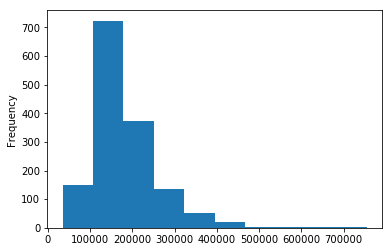

In [13]:
train.SalePrice.plot(kind='hist')

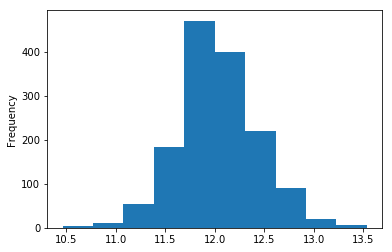

In [14]:
np.log(train.SalePrice).plot(kind='hist')

In [15]:
train.to_pickle('train1.pkl')